## Sympy - Symbolic algebra in Python

In [14]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [15]:
from sympy import *

In [16]:
init_printing()

# or with older versions of sympy/ipython, load the IPython extension
#%load_ext sympy.interactive.ipythonprinting
# or
#%load_ext sympyprinting

In [17]:
x = Symbol('x')

In [18]:
(pi + x)**2

In [19]:
# alternative way of defining symbols
a, b, c = symbols("a, b, c")

In [20]:
type(a)

sympy.core.symbol.Symbol

In [21]:
x = Symbol('x', real=True)
x.is_imaginary

False

In [22]:
x = Symbol('x', positive=True)
x > 0

## Numerical evaluation

SymPy uses a library for artitrary precision as numerical backend, and has predefined SymPy expressions for a number of mathematical constants, such as: pi, e, oo for infinity.

To evaluate an expression numerically we can use the evalf function (or N). It takes an argument n which specifies the number of significant digits.

In [23]:
pi.evalf(n=50)

In [24]:
N(y, 5) # same as evalf

NameError: name 'y' is not defined

In [25]:
y.subs(x, 1.5)

NameError: name 'y' is not defined

## Algebraic manipulations

##### Expand and factor

In [26]:
(x+1)*(x+2)*(x+3)

In [27]:
expand((x+1)*(x+2)*(x+3))

In [28]:
factor(x**3 + 6 * x**2 + 11*x + 6)

In [29]:
sin(a+b)

In [30]:
expand(sin(a+b), trig=True)

#### Simplify

In [31]:
# simplify expands a product
simplify((x+1)*(x+2)*(x+3))

In [32]:
# simplify uses trigonometric identities
simplify(sin(a)**2 + cos(a)**2)

In [33]:
simplify(cos(x)/sin(x))

#### apart and together

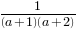

In [34]:
f1 = 1/((a+1)*(a+2))
f1

In [35]:
apart(f1)

  1       1  
───── + ─────
a + 3   a + 2


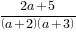

In [36]:
f2 = 1/(a+2) + 1/(a+3)
pprint(f2)
together(f2)


## Calculus

#### Differentiation

In [37]:
y

NameError: name 'y' is not defined

In [38]:
diff(y**2, x)

NameError: name 'y' is not defined

In [39]:
diff(y**2, x, x)

NameError: name 'y' is not defined

In [40]:
diff(y**2, x, 2) # same as above

NameError: name 'y' is not defined

In [41]:
x, y, z = symbols("x,y,z")
f = sin(x*y) + cos(y*z)

$\frac{\partial^3f}{\partial x \partial y^2}$ :

In [42]:
diff(f, x, 1, y, 2)

#### Integration

In [43]:
f

$\int (\sin(xy)+cos(yz)) dx$ :

In [44]:
integrate(f, x)

ValueError: 
x \cos{\left (y z \right )} + \begin{cases} 0 & \text{for}\: y = 0 \\- \cos{\left (x y \right )} / y & \text{otherwise} \end{cases}
                              ^
Unknown symbol: \begin (at char 30), (line:1, col:31)

             ⎛⎧    0       for y = 0⎞
             ⎜⎪                     ⎟
x⋅cos(y⋅z) + ⎜⎨-cos(x⋅y)            ⎟
             ⎜⎪──────────  otherwise⎟
             ⎝⎩    y                ⎠

By providing limits for the integration variable we can evaluate definite integrals:

In [ ]:
integrate(f, (x, -1, 1))

#### Sums and products

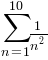

In [45]:
n = Symbol("n")
Sum(1/n**2, (n, 1, 10))

In [46]:
Sum(1/n**2, (n,1, 10)).evalf()

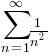

In [47]:
Sum(1/n**2, (n, 1, oo))

In [48]:
Sum(1/n**2, (n, 1, oo)).evalf()

In [49]:
pi**2/6

In [50]:
(pi**2/6).evalf() # Verification

Products work much the same way:

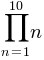

In [51]:
Product(n, (n, 1, 10)) # 10!

## Limits

In [52]:
limit(sin(x)/x, x, 0)

We can use 'limit' to check the result of derivation using the diff function:

In [53]:
f

In [54]:
diff(f, x)

$\displaystyle \frac{\mathrm{d}f(x,y)}{\mathrm{d}x} = \frac{f(x+h,y)-f(x,y)}{h}$

In [55]:
h = Symbol("h")
limit((f.subs(x, x+h) - f)/h, h, 0)

We can change the direction from which we approach the limiting point using the dir keywork argument:

In [56]:
limit(1/x, x, 0, dir="+")

In [57]:
limit(1/x, x, 0, dir="-")

## Series

In [58]:
s1=series(exp(x), x)
s1

In [59]:
s2 = sin(x).series(x, 0, 5)
s2

## Linear algebra

#### Matrices

In [60]:
m11, m12, m21, m22 = symbols("m11, m12, m21, m22")
b1, b2 = symbols("b1, b2")

In [61]:
A = Matrix([[m11, m12],[m21, m22]])
A

ValueError: 
\left[\begin{smallmatrix}m_{11} & m_{12}\\m_{21} & m_{22}\end{smallmatrix}\right]
      ^
Expected "\right" (at char 6), (line:1, col:7)

⎡m₁₁  m₁₂⎤
⎢        ⎥
⎣m₂₁  m₂₂⎦

In [ ]:
b = Matrix([[b1], [b2]])
b

In [ ]:
A * b

With Matrix class instances we can do the usual matrix algebra operations:

In [ ]:
A**2

In [ ]:
A.det()

In [ ]:
A.inv()

## Solving equations

For solving equations and systems of equations we can use the solve function:

In [62]:
solve(x**2 - 1, x)

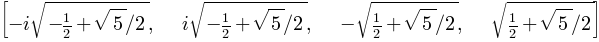

In [63]:
solve(x**4 - x**2 - 1, x)

In terms of other symbolic expressions:

In [64]:
solve([x + y - 1, x - y - 1], [x,y])

In [65]:
solve([x + y - a, x - y - c], [x,y])

## Further reading

This Notebook is a extract from the following Notebook :

http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-5-Sympy.ipynb

Other sources:

http://sympy.org/en/index.html 

http://docs.sympy.org/latest/tutorial/intro.html#a-more-interesting-example

http://docs.sympy.org/0.7.2/modules/physics/quantum/index.html
